# Magnetometer Hard and Soft Iron calibration

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

### MPU Magnetometer data . . .

In [2]:
data_filename = "mpu_raw_mag.csv"
names =['mx', 'my', 'mz']
df= pd.read_csv("Datasets/" + data_filename, header=None, 
                sep="\t", delim_whitespace=False, names=names, na_values='?')
print("Data dimensions = ", df.shape)
# df.head(3)
xy = df[['mx', 'my']].values
yz = df[['my', 'mz']].values
xz = df[['mx', 'mz']].values

Data dimensions =  (2964, 3)


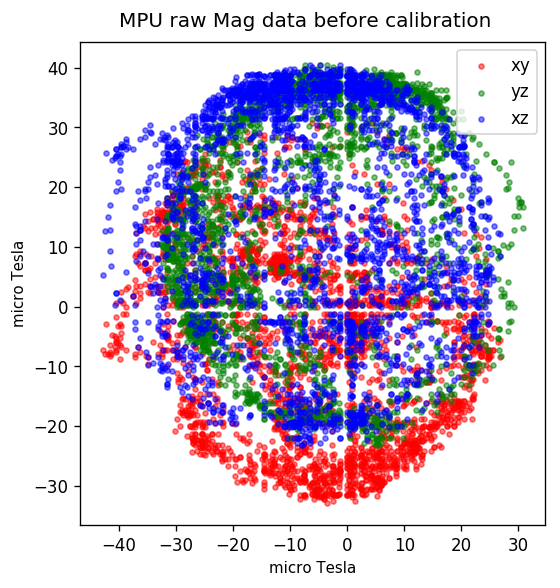

In [3]:
plt.figure(num=None, figsize=(5, 5), dpi=120)
plt.suptitle('MPU raw Mag data before calibration', fontsize=12)
plt.subplots_adjust(top=0.93)
plt.scatter(xy[:, 0], xy[:, 1], c='r', alpha=0.5, marker=".")
plt.scatter(yz[:, 0], yz[:, 1], c='g', alpha=0.5, marker=".")
plt.scatter(xz[:, 0], xz[:, 1], c='b', alpha=0.5, marker=".")
plt.legend(['xy', 'yz', 'xz'], loc='upper right')
plt.ylabel("micro Tesla", fontsize=9)
plt.xlabel("micro Tesla", fontsize=9)
plt.show()

## Hard Iron Calibration

In [4]:
x = [float(row[0]) for row in df.values]
y = [float(row[1]) for row in df.values]
z = [float(row[2]) for row in df.values]

offset_x = (max(x) + min(x)) / 2 ;    print("offset_x = {0:.2f}".format(offset_x))
offset_y = (max(y) + min(y)) / 2 ;    print("offset_y = {0:.2f}".format(offset_y))
offset_z = (max(z) + min(z)) / 2 ;    print("offset_z = {0:.2f}".format(offset_z))

out_file = open("Datasets/"+data_filename+"_hard_iron_corrected.csv", 'w')
for row in df.values:
    corrected_x = float(row[0]) - offset_x
    corrected_y = float(row[1]) - offset_y
    corrected_z = float(row[2]) - offset_z
    print("\t".join(format(value, ".15f") for value in [corrected_x, corrected_y, corrected_z]), file=out_file)
out_file.close()

offset_x = -8.04
offset_y = -1.03
offset_z = 8.64


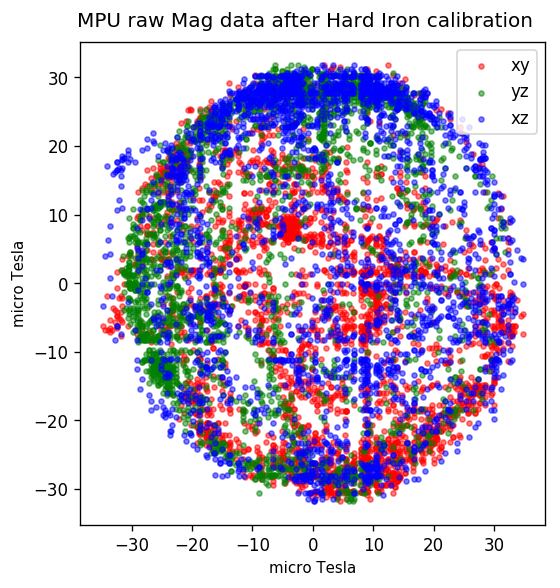

In [5]:
df2 = pd.read_csv("Datasets/"+data_filename+"_hard_iron_corrected.csv", header=None, sep="\t", 
                delim_whitespace=False, names=names, na_values='?')

xy = df2[['mx', 'my']].values
yz = df2[['my', 'mz']].values
xz = df2[['mx', 'mz']].values

plt.close()
plt.figure(num=None, figsize=(5, 5), dpi=120)
plt.suptitle('MPU raw Mag data after Hard Iron calibration', fontsize=12)
plt.subplots_adjust(top=0.93)
plt.scatter(xy[:, 0], xy[:, 1], c='r', alpha=0.5,  marker=".")
plt.scatter(yz[:, 0], yz[:, 1], c='g', alpha=0.5,  marker=".")
plt.scatter(xz[:, 0], xz[:, 1], c='b', alpha=0.5,  marker=".")
plt.legend(['xy', 'yz', 'xz'], loc='upper right')
plt.ylabel("micro Tesla", fontsize=9)
plt.xlabel("micro Tesla", fontsize=9)
plt.show()

## Soft Iron Calibration

In [6]:
x = [float(row[0]) for row in df2.values]     # at this point df2 contains mag_data1_corrected.csv 's data
y = [float(row[1]) for row in df2.values]
z = [float(row[2]) for row in df2.values]

avg_delta_x = (max(x) - min(x)) / 2   
avg_delta_y = (max(y) - min(y)) / 2 
avg_delta_z = (max(z) - min(z)) / 2

avg_delta = (avg_delta_x + avg_delta_y + avg_delta_z) / 3

print("Magnetometer scale factors:")
scale_x = avg_delta / avg_delta_x;    print("scale_x = {0:.2f}".format(scale_x))
scale_y = avg_delta / avg_delta_y;    print("scale_y = {0:.2f}".format(scale_y))
scale_z = avg_delta / avg_delta_z;    print("scale_z = {0:.2f}".format(scale_z))

out_file2 = open("Datasets/"+data_filename+"_hard_soft_corrected.csv", 'w')
for row in df2.values:
    corrected_x = float(row[0]) * scale_x
    corrected_y = float(row[1]) * scale_x
    corrected_z = float(row[2]) * scale_x
    print("\t".join(format(value, ".15f") for value in [corrected_x, corrected_y, corrected_z]), file=out_file2)
out_file2.close()

Magnetometer scale factors:
scale_x = 0.94
scale_y = 1.03
scale_z = 1.03


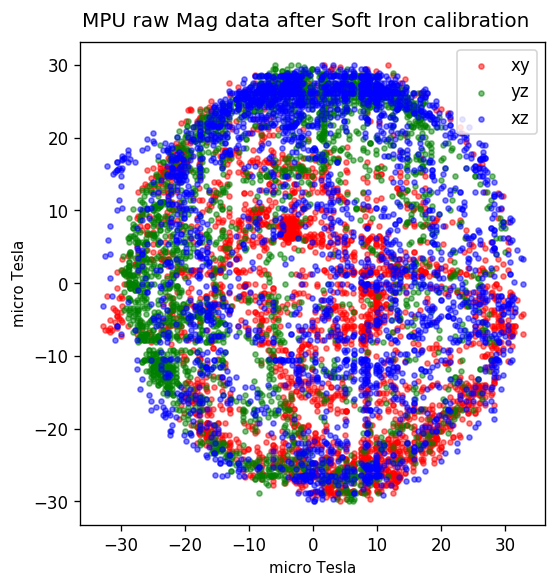

In [7]:
df3 = pd.read_csv("Datasets/"+data_filename+"_hard_soft_corrected.csv", header=None, sep="\t", 
                delim_whitespace=False, names=names, na_values='?')

xy = df3[['mx', 'my']].values
yz = df3[['my', 'mz']].values
xz = df3[['mx', 'mz']].values

plt.close()
plt.figure(num=None, figsize=(5, 5), dpi=120)
plt.suptitle('MPU raw Mag data after Soft Iron calibration', fontsize=12)
plt.subplots_adjust(top=0.93)
plt.scatter(xy[:, 0], xy[:, 1], c='r', alpha=0.5,  marker=".")
plt.scatter(yz[:, 0], yz[:, 1], c='g', alpha=0.5,  marker=".")
plt.scatter(xz[:, 0], xz[:, 1], c='b', alpha=0.5,  marker=".")
plt.legend(['xy', 'yz', 'xz'], loc='upper right')
plt.ylabel("micro Tesla", fontsize=9)
plt.xlabel("micro Tesla", fontsize=9)
plt.show()

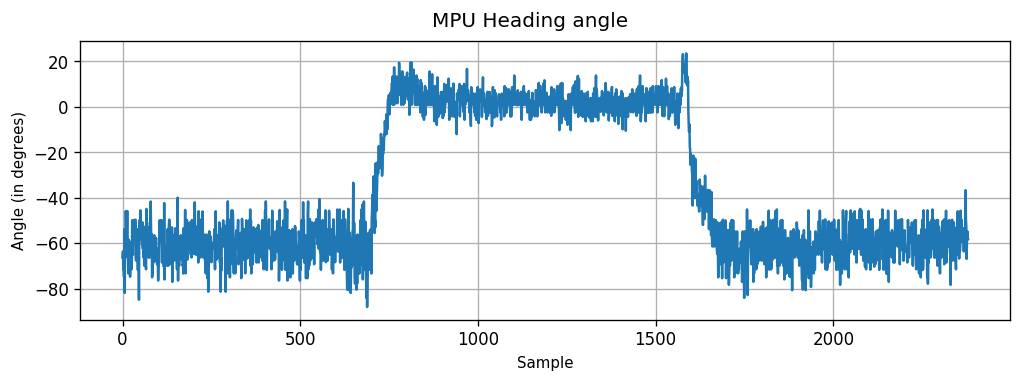

In [8]:
label = ["data"]
df4 = pd.read_csv("Datasets/mpu_heading4.txt", header=None,  delim_whitespace=False, names=label, na_values='?')

d = df4[['data']].values

plt.close()
plt.figure(num=None, figsize=(10, 3), dpi=120)
plt.suptitle('MPU Heading angle', fontsize=12)
plt.grid()
plt.subplots_adjust(top=0.90)
plt.plot(d)
plt.ylabel("Angle (in degrees)", fontsize=9)
plt.xlabel("Sample", fontsize=9)
plt.show()

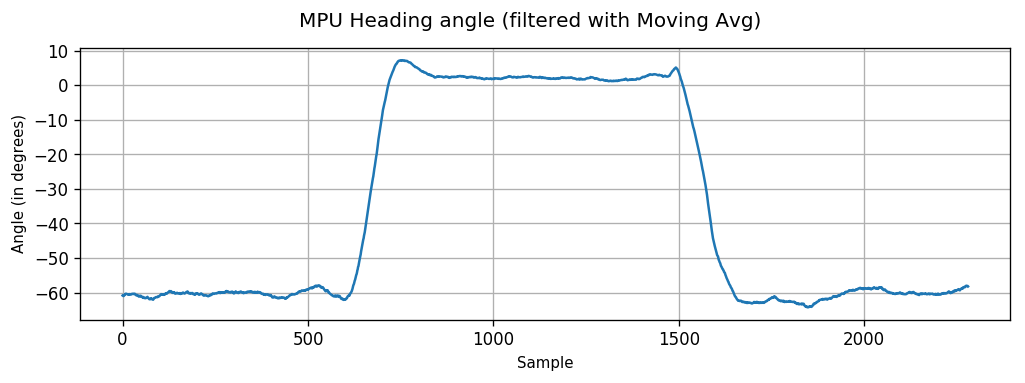

In [9]:
modes = ['full', 'same', 'valid']

# window = np.zeros((20,))
d = d.reshape((d.shape[0]))

plt.close()
plt.figure(num=None, figsize=(10, 3), dpi=120)
plt.suptitle('MPU Heading angle (filtered with Moving Avg)', fontsize=12)
plt.plot(np.convolve(d, np.ones((100,))/100, mode='valid'));
plt.grid()
# plt.axis([-100, 2100, -90, 22]);
plt.ylabel("Angle (in degrees)", fontsize=9)
plt.xlabel("Sample", fontsize=9)
plt.show()

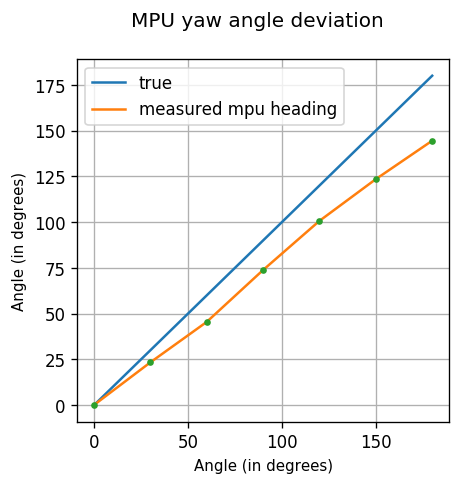

In [10]:
angles = np.linspace(0,210, 7, endpoint=False)
mpu_yaw = np.array([0.1, 23.4, 45.5, 73.85, 100.7, 123.5, 144.5])

plt.close()
plt.figure(num=None, figsize=(4, 4), dpi=120)
plt.suptitle('MPU yaw angle deviation', fontsize=12)
plt.plot(angles, angles)
plt.plot(angles, mpu_yaw)
plt.plot(angles, mpu_yaw, ".")
plt.grid()
# plt.axis([-100, 2100, -90, 22]);
plt.ylabel("Angle (in degrees)", fontsize=9)
plt.xlabel("Angle (in degrees)", fontsize=9)
plt.legend(['true', 'measured mpu heading'], loc='upper left')
plt.show()


In [11]:
data_filename = "mag_data3.csv"
names =['mx', 'my', 'mz']
df= pd.read_csv("Datasets/" + data_filename, header=None, 
                sep="\t", delim_whitespace=False, names=names, na_values='?')
print("Data dimensions = ", df.shape)
# df.head(3)
xy = df[['mx', 'my']].values
yz = df[['my', 'mz']].values
xz = df[['mx', 'mz']].values

Data dimensions =  (2438, 3)


### LSM Magnetometer data . . .

In [55]:
# data_filename = "lsm_mag_data.csv"
data_filename = "lsm_mag_data_July13.csv"
names =['mx', 'my', 'mz']
df= pd.read_csv("Datasets/" + data_filename, header=None, 
                sep="\t", delim_whitespace=False, names=names, na_values='?')
print("Data dimensions = ", df.shape)
# df.head(3)
xy = df[['mx', 'my']].values
yz = df[['my', 'mz']].values
xz = df[['mx', 'mz']].values

Data dimensions =  (21944, 3)


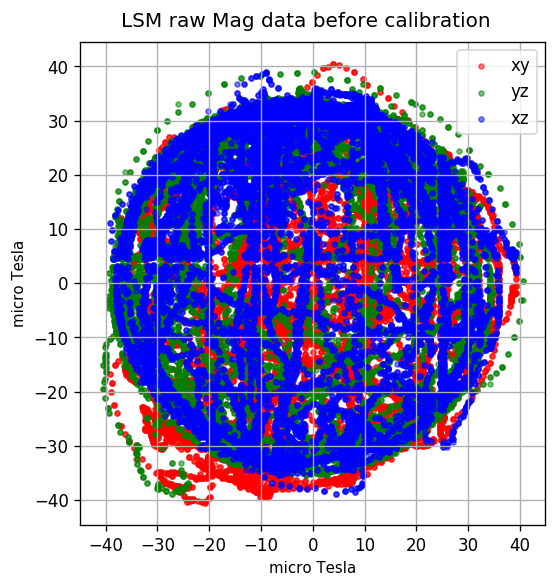

In [61]:
plt.close()
plt.figure(num=None, figsize=(5, 5), dpi=120)
plt.suptitle('LSM raw Mag data before calibration', fontsize=12)
plt.subplots_adjust(top=0.93)
plt.scatter(xy[:, 0], xy[:, 1], c='r', alpha=0.5, marker=".")
plt.scatter(yz[:, 0], yz[:, 1], c='g', alpha=0.5, marker=".")
plt.scatter(xz[:, 0], xz[:, 1], c='b', alpha=0.5, marker=".")
plt.legend(['xy', 'yz', 'xz'], loc='upper right')
plt.ylabel("micro Tesla", fontsize=9)
plt.xlabel("micro Tesla", fontsize=9)
plt.grid()
plt.show()

## Hard Iron Calibration

In [62]:
x = [float(row[0]) for row in df.values]
y = [float(row[1]) for row in df.values]
z = [float(row[2]) for row in df.values]

offset_x = (max(x) + min(x)) / 2 ;    print("offset_x = {0:.2f}".format(offset_x))
offset_y = (max(y) + min(y)) / 2 ;    print("offset_y = {0:.2f}".format(offset_y))
offset_z = (max(z) + min(z)) / 2 ;    print("offset_z = {0:.2f}".format(offset_z))

out_file = open("Datasets/"+data_filename+"_hard_iron_corrected.csv", 'w')
for row in df.values:
    corrected_x = float(row[0]) - offset_x
    corrected_y = float(row[1]) - offset_y
    corrected_z = float(row[2]) - offset_z
    print("\t".join(format(value, ".15f") for value in [corrected_x, corrected_y, corrected_z]), file=out_file)
out_file.close()

offset_x = -24.39
offset_y = 30.70
offset_z = -4.35


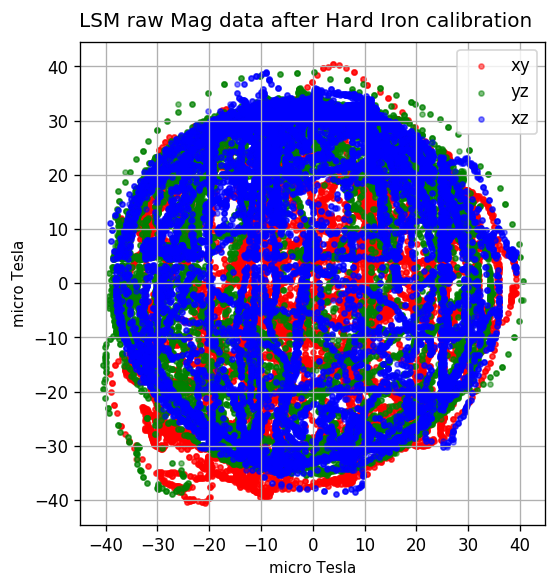

In [63]:
df2 = pd.read_csv("Datasets/"+data_filename+"_hard_iron_corrected.csv", header=None, sep="\t", 
                delim_whitespace=False, names=names, na_values='?')

xy = df2[['mx', 'my']].values
yz = df2[['my', 'mz']].values
xz = df2[['mx', 'mz']].values

plt.close()
plt.figure(num=None, figsize=(5, 5), dpi=120)
plt.suptitle('LSM raw Mag data after Hard Iron calibration', fontsize=12)
plt.subplots_adjust(top=0.93)
plt.scatter(xy[:, 0], xy[:, 1], c='r', alpha=0.5,  marker=".")
plt.scatter(yz[:, 0], yz[:, 1], c='g', alpha=0.5,  marker=".")
plt.scatter(xz[:, 0], xz[:, 1], c='b', alpha=0.5,  marker=".")
plt.legend(['xy', 'yz', 'xz'], loc='upper right')
plt.ylabel("micro Tesla", fontsize=9)
plt.xlabel("micro Tesla", fontsize=9)
plt.grid()
plt.show()

## Soft Iron Calibration

In [64]:
x = [float(row[0]) for row in df2.values]     # at this point df2 contains mag_data1_corrected.csv 's data
y = [float(row[1]) for row in df2.values]
z = [float(row[2]) for row in df2.values]

avg_delta_x = (max(x) - min(x)) / 2   
avg_delta_y = (max(y) - min(y)) / 2 
avg_delta_z = (max(z) - min(z)) / 2

avg_delta = (avg_delta_x + avg_delta_y + avg_delta_z) / 3

print("Magnetometer scale factors:")
scale_x = avg_delta / avg_delta_x;    print("scale_x = {0:.2f}".format(scale_x))
scale_y = avg_delta / avg_delta_y;    print("scale_y = {0:.2f}".format(scale_y))
scale_z = avg_delta / avg_delta_z;    print("scale_z = {0:.2f}".format(scale_z))

out_file2 = open("Datasets/"+data_filename+"_hard_soft_corrected.csv", 'w')
for row in df2.values:
    corrected_x = float(row[0]) * scale_x
    corrected_y = float(row[1]) * scale_x
    corrected_z = float(row[2]) * scale_x
    print("\t".join(format(value, ".15f") for value in [corrected_x, corrected_y, corrected_z]), file=out_file2)
out_file2.close()

Magnetometer scale factors:
scale_x = 1.01
scale_y = 0.98
scale_z = 1.02


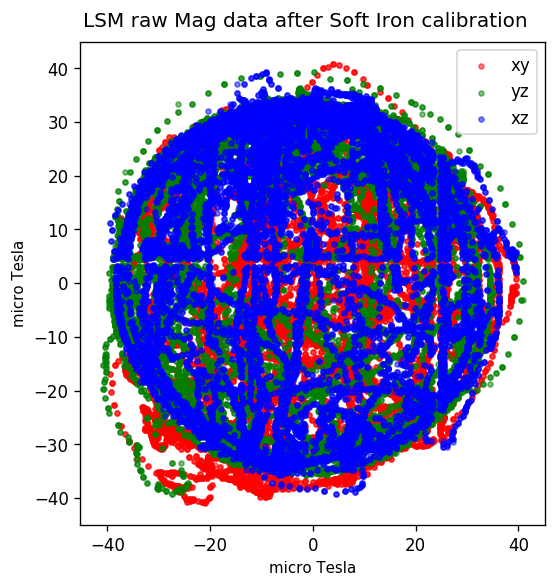

In [65]:
df3 = pd.read_csv("Datasets/"+data_filename+"_hard_soft_corrected.csv", header=None, sep="\t", 
                delim_whitespace=False, names=names, na_values='?')

xy = df3[['mx', 'my']].values
yz = df3[['my', 'mz']].values
xz = df3[['mx', 'mz']].values

plt.close()
plt.figure(num=None, figsize=(5, 5), dpi=120)
plt.suptitle('LSM raw Mag data after Soft Iron calibration', fontsize=12)
plt.subplots_adjust(top=0.93)
plt.scatter(xy[:, 0], xy[:, 1], c='r', alpha=0.5,  marker=".")
plt.scatter(yz[:, 0], yz[:, 1], c='g', alpha=0.5,  marker=".")
plt.scatter(xz[:, 0], xz[:, 1], c='b', alpha=0.5,  marker=".")
plt.legend(['xy', 'yz', 'xz'], loc='upper right')
plt.ylabel("micro Tesla", fontsize=9)
plt.xlabel("micro Tesla", fontsize=9)
plt.show()

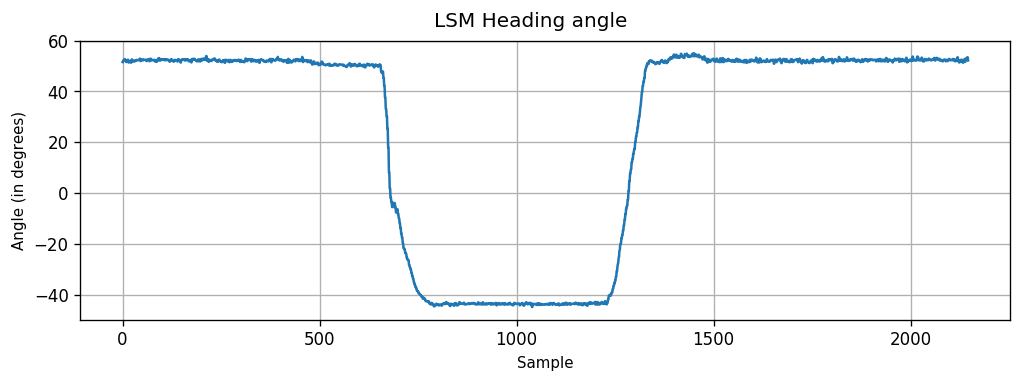

In [20]:
label = ["data"]
# df4 = pd.read_csv("Datasets/lsm_heading_angle_data.txt", header=None,  
#                   delim_whitespace=False, names=label, na_values='?')

df4 = pd.read_csv("Datasets/lsm_heading_angle_data2.txt", header=None,  
                  delim_whitespace=False, names=label, na_values='?')



d = df4[['data']].values

plt.close()
plt.figure(num=None, figsize=(10, 3), dpi=120)
plt.suptitle('LSM Heading angle', fontsize=12)
plt.grid()
plt.subplots_adjust(top=0.90)
plt.plot(d)
plt.ylabel("Angle (in degrees)", fontsize=9)
plt.xlabel("Sample", fontsize=9)
plt.show()

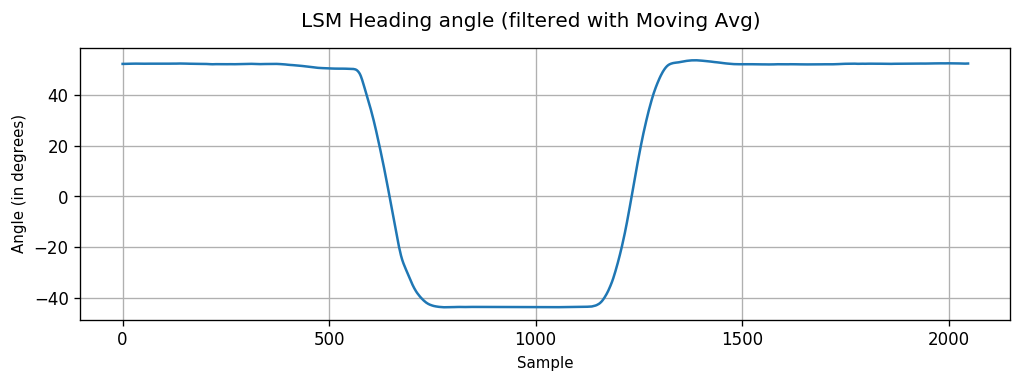

In [21]:
d = d.reshape((d.shape[0]))

plt.close()
plt.figure(num=None, figsize=(10, 3), dpi=120)
plt.suptitle('LSM Heading angle (filtered with Moving Avg)', fontsize=12)
plt.plot(np.convolve(d, np.ones((100,))/100, mode='valid'));
plt.grid()
# plt.axis([-100, 2200, -150, -20]);
plt.ylabel("Angle (in degrees)", fontsize=9)
plt.xlabel("Sample", fontsize=9)
plt.show()